# Classification Using Scikit-learn

We're going to explore in more detail some of the functionality provided by scikit-learn (`sklearn`) for doing machine learning, and specifically in this exercise, classification.  We will revisit the World Happiness Report (WHR) data for this exercise, bringing in some additional information that will enable us to formulate a classification problem to predict categorical labels on the dataset.

Execute the code cell below to import some modules and read in and preprocess the WHR data as we have done previously.  The last line in the code cell below returns the head of the basic WHR dataframe, to remind you what is in that dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

dfraw = pd.read_excel('WHR2018Chapter2OnlineData.xls', sheet_name='Table2.1')
cols_to_include = ['country', 'year', 'Life Ladder', 
                   'Positive affect','Negative affect',
                   'Log GDP per capita', 'Social support',
                   'Healthy life expectancy at birth', 
                   'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption']
renaming = {'Life Ladder': 'Happiness', 
            'Log GDP per capita': 'LogGDP', 
            'Social support': 'Support', 
            'Healthy life expectancy at birth': 'Life', 
            'Freedom to make life choices': 'Freedom', 
            'Perceptions of corruption': 'Corruption', 
            'Positive affect': 'Positive', 
            'Negative affect': 'Negative'}
df = dfraw[cols_to_include].rename(renaming, axis=1)
key_vars = ['Happiness', 'LogGDP', 'Support', 'Life', 'Freedom', 'Generosity', 'Corruption', 'Positive', 'Negative']
df.head()

,country,year,Happiness,Positive,Negative,LogGDP,Support,Life,Freedom,Generosity,Corruption
0,Afghanistan,2008,3.723590,0.517637,0.258195,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686
1,Afghanistan,2009,4.401778,0.583926,0.237092,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035
2,Afghanistan,2010,4.758381,0.618265,0.275324,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766
3,Afghanistan,2011,3.831719,0.611387,0.267175,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109
4,Afghanistan,2012,3.782938,0.710385,0.267919,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620


### Step 1.

We will first augment the core WHR dataset that we have been working with to bring in some additional information that is included in a different worksheet in the WHR spreadsheet.  Since this is mostly about data processing rather than machine learning, simply execute the next two code cells below.  But study each line of code and the associated comments, and then examine the head of the new dataframe named ```df2``` to understand what has been done.

In [2]:
# read in data from SupportingFactors worksheet into a new dataframe dfsupp
dfsupp = pd.read_excel('WHR2018Chapter2OnlineData.xls', sheet_name='SupportingFactors')

# extract out region information from SupportingFactors dataframe
regions = dfsupp[['country', 'Region indicator']].rename({'Region indicator': 'region'}, axis=1)

# examine head of regions dataframe -- each country has an associated world region
regions.head()

,country,region
0,Afghanistan,South Asia
1,Albania,Central and Eastern Europe
2,Algeria,Middle East and North Africa
3,Angola,Sub-Saharan Africa
4,Argentina,Latin America and Caribbean


In [3]:
# compute the mean values of all the WHR data for each country, averaging over all years in the dataset
dfmean = df.groupby('country').mean().drop('year', axis=1)

# merge the mean WHR data with the region information extracted previously
df2 = pd.merge(dfmean, regions, on='country').dropna()

# set the index of df2 to be the country name
df2.set_index('country', inplace=True)

# examine head of df2 dataframe -- mean WHR values for each country, along with associated regions
df2.head()

,Happiness,Positive,Negative,LogGDP,Support,Life,Freedom,Generosity,Corruption,region
country,,,,,,,,,,
Afghanistan,3.806614,0.580873,0.301283,7.419697,0.517146,50.838271,0.544895,0.118428,0.826794,South Asia
Albania,4.988791,0.642628,0.303256,9.247059,0.723204,68.027213,0.626155,-0.105019,0.859691,Central and Eastern Europe
Algeria,5.555004,0.616524,0.265460,9.501728,0.804633,64.984461,0.536398,-0.208236,0.661478,Middle East and North Africa
Angola,4.420299,0.613339,0.351173,8.713935,0.737973,51.729801,0.455957,-0.077940,0.867018,Sub-Saharan Africa
Argentina,6.406131,0.840998,0.273187,9.826051,0.906080,66.764205,0.753122,-0.154544,0.844038,Latin America and Caribbean


### Step 2.

It is this new dataframe ```df2``` that we want to use for machine learning.  For each country in the dataset, we have a set of mean numerical values ('Happiness', 'Positive', 'Negative', etc., which are all listed in the variable ```key_vars``` defined above) and a categorical value ('region').  We would like to know if the raw numerical data are  predictive of the region.  In other words, if someone gave you a set of numerical data on Happiness, etc. for an unknown country, would you be able to predict what region of the world it might be located in?  This is an example of classification, where we will train a model based on the numerical data and the associated labels (regions).

In order to proceed, we first want to extract and process some data from our ```df2``` dataframe.  We need to separate the data into two parts:
* the region data that we want to be able to predict (we'll call it ```y```)
* the WHR numerical data that we want to use as input to our prediction (we'll call it ```x```)

Again, our goal is to build a classifier that we will train on a subset of the WHR numerical data (x) and the region data (y), so that we can predict regions from data for countries that we have not trained our model on.

In the code cell below:
* Extract the subset of ```df2``` associated with the columns in ```key_vars``` and assign it to the variable ```x```.
* Extract the subset of ```df2``` associated with the region column, and assign it to the variable ```y```.
* Print the shape of both `x` and `y`.

## Graded Cell

This cell is worth 20% of the grade for this assignment.

In [4]:
# YOUR CODE HERE
x=df2.loc[:,key_vars]
y=df2.loc[:,'region']
x.shape, y.shape

((152, 9), (152,))

## Self-Check

Run the cell below to test the correctness of your code above before submitting for grading.

In [5]:
# Run this self-test cell to check your code

from jn import testXY
try:
    print(testXY(x,y, df2))
except Exception as e:
    print("Error!\n" + str(e))


Correct!


### Step 3.

You should note that the shape of ```x``` is (152, 9) and the shape of ```y``` is (152,).  This is analogous to what we saw in the earlier exercise on hand-written digits.  There are 152 samples (countries), and 9 features (each of the key_vars) that we are making predictions from.

Because the numerical data columns in ```x``` represent different quantities and have different scales, it is useful to preprocess the data some more to remove that source of variation.  `sklearn` provides various utilities for such preprocessing.  We will use one here called ```StandardScaler```, which will transform a data set so that each resulting column has zero mean and unit standard deviation.

Carrying out this scaling is a little complicated if we want to maintain the basic structure of the dataframe, so we have provided the relevant code in the next code cell below.  (The code examples describing StandardScaler in the [sklearn documentation](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler) typically just extract out the numerical values in numpy arrays, but for this exercise, we'd like to keep the labels together in a dataframe.)

First examine, and then execute the code cell below.  This code does the following:
* imports the `StandardScaler` object
* creates and fits a `StandardScaler` object to our dataframe ```x```
* creates a new dataframe ```x_scaled``` that contains the scaled (transformed) data, using the column and index labels from the unscaled dataframe ```x```
* prints out the mean and standard deviation of each column of ```x_scaled```
* peeks at the head of the new dataframe ```x_scaled```

In examining the output, check that the means of each column have been scaled to nearly zero (to within a very small tolerance) and the standard deviations have been scaled to one. Some of the very small numbers might be printed out in scientific notation, where a number like ```1.928282e-16``` means ```1.928282 * 10**(-16)```.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns = x.columns, index = x.index)

print(np.mean(x_scaled, axis=0))
print(np.std(x_scaled, axis=0))

x_scaled.head()

Happiness     1.928282e-16
LogGDP        5.551115e-17
Support      -2.672387e-16
Life         -3.359885e-17
Freedom       6.748987e-16
Generosity   -4.747664e-18
Corruption    1.175960e-16
Positive      1.807764e-16
Negative      2.731733e-16
dtype: float64
Happiness     1.0
LogGDP        1.0
Support       1.0
Life          1.0
Freedom       1.0
Generosity    1.0
Corruption    1.0
Positive      1.0
Negative      1.0
dtype: float64


,Happiness,LogGDP,Support,Life,Freedom,Generosity,Corruption,Positive,Negative
country,,,,,,,,,
Afghanistan,-1.443128,-1.438896,-2.425953,-1.333584,-1.397623,0.735439,0.451854,-1.262731,0.471370
Albania,-0.360792,0.054466,-0.681799,0.776161,-0.776670,-0.719736,0.632648,-0.638194,0.499009
Algeria,0.157600,0.262588,0.007447,0.402698,-1.462554,-1.391919,-0.456675,-0.902184,-0.030449
Angola,-0.881273,-0.381215,-0.556782,-1.224159,-2.077245,-0.543385,0.672914,-0.934399,1.170248
Argentina,0.936845,0.527632,0.866136,0.621142,0.193546,-1.042257,0.546624,1.367958,0.077797


### Step 4.

Now that the data have been preprocessed, we can begin with our classification analysis.  Let's begin by importing some additional things from `sklearn`.  Execute the code cell below to import:
* the ```svm``` and ```tree``` submodules
* the ```train_test_split``` function
* the ```accuracy_score``` function

We'll discuss in more detail below what each of these does.

In [7]:
from sklearn import svm, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Step 5.

One of the convenience functions that we imported above is called ```train_test_split```.  As its name suggests, this function splits a dataset into separate training and testing sets.  The [online documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn-model-selection-train-test-split) indicates that it splits a dataset randomly, such that approximately 25% of the data winds up in the test set and the remaining 75% in the training set.  The documentation is a bit confusing, since the function can take a variable number of arrays as inputs; in our case, we want to split up 2 arrays (```x_scaled``` and ```y```) into coordinated test and train sets, so that the function will return a total of 4 subarrays (```x_train, x_test, y_train, y_test```).

Because ```train_test_split``` generates random splits of the input data, each time we call the function we will get a different split.  Sometimes it is useful, for the purposes of code development, to be able to get reproducible random numbers or random splits, which can then be relaxed once one wishes to generate statistics over many random runs.     With ```train_test_split```, this can be accomplished by using the ```random_state``` option; if specified with that state as an integer, then the same random split will be generated each time the function is called (until one changes the value of the integer).  This is known as providing a seed to the pseudo-random number generator that is used by ```train_test_split```.

In the code cell below, enter and execute a call to ```train_test_split``` that takes ```x_scaled``` and ```y``` as inputs, along with the optional parameter ```random_state=0```, and returns the 4 data subsets mentioned above, to be named as ```x_train```, ```x_test```, ```y_train```, ```y_test```.  The online documentation provides an example of what such a function call looks like. After the function call, print the shapes of each of the four arrays that are returned.

## Graded Cell

This cell is worth 20% of the grade for this assignment.

In [8]:
# YOUR CODE HERE
x_train,x_test, y_train, y_test=train_test_split(x_scaled,y, random_state=0)

## Self-Check

Run the cell below to test the correctness of your code above before submitting for grading.

In [9]:
# Run this self-test cell to check your code; do not add code or delete code in this cell
from jn import testSplit
try:
    print(testSplit(x_train, y_train, x_test, y_test, df2))
except Exception as e:
    print("Error!\n" + str(e))


Correct!


### Step 6.

Having split our datasets, we want to first train a classifier on our training data so that we can apply it to the testing data.  One way of assessing the performance of a classifier is by computing its accuracy on the test data, that is, what fraction of the test data are correctly predicted by the classifier.  Fortunately, `sklearn` provides a built-in function named ```accuracy_score``` that carries out this computation; we imported it above, and you can read more about it in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy_score#sklearn.metrics.accuracy_score).

We imported above the ```svm``` and ```tree``` submodules from sklearn.  These provide support for Support Vector Machine (svm) and Decision Tree (tree) machine learning algorithms.  For more information, review the [Support Vector Machines (SVMs) documentation](https://scikit-learn.org/stable/modules/svm.html) and the [Decision Trees documentation](https://scikit-learn.org/stable/modules/tree.html).  Under the hood, these are very different types of algorithms.  Decision Trees try to formulate a series of yes/no questions based on the data that can distinguish the categories from one another.  SVMs, on the other hand, use techniques from geometry to find cuts through the data space to separate different categories from one another.  Understanding how these methods work in detail is beyond the scope of this exercise, but fortunately, despite the very different data structures and algorithms used internally, `sklearn` provides a uniform interface that lets us easily build these different sorts of classifiers and compare their performance.

We will first consider SVMs, and then revisit the problem with Decision Trees.

In the code cell below:
* create a new ```svm.SVC()``` object and assign it to the variable ```clf1``` &mdash;  a call to ```svm.SVC()``` creates a Support Vector Classifier from the svm submodule, similar to what we did in the earlier exercise on hand-written digits
* call the ```fit``` method on ```clf1``` with the `x` and `y` training data (i.e., training the model to associate ```x_train``` with ```y_train```)
* call the ```predict``` method on ```clf1``` on the `x` testing data and assign the result to the variable ```predictions1```, in order to make predictions for those inputs
* call the ```accuracy_score``` function on the `y` testing data and the test predictions you generated and assign the result to the variable ```score1```
* print the value of ```score1```

The accuracy score is a fraction between 0 and 1 indicating the fraction of predictions that match the true value in the test set.

## Graded Cell

This cell is worth 20% of the grade for this assignment.

In [10]:
# YOUR CODE HERE
clf1=svm.SVC()
clf1.fit(x_train, y_train)
predictions1=clf1.predict(x_test)
score1=accuracy_score(y_test,predictions1)
score1

0.7105263157894737

## Self-Check

Run the cell below to test the correctness of your code above before submitting for grading.<br><br> If your code does not pass the self-check, you should check that you split up the test and training sets based on the scaled data (`x_scaled`), rather than the unscaled data that was in the original dataframe.

In [11]:
# Run this self-test cell to check your code; do not add code or delete code in this cell
from jn import testAccuracy
try:
    print(testAccuracy(score1))
except Exception as e:
    print("Error!\n" + str(e))

Correct!


### Step 7.

The accuracy score reported should be around 71% (0.71).  This means that approximately 29% of the countries in the test set had their regions mispredicted.  While that doesn't sound great, it could be that the WHR numerical data really are not always completely predictive of region; one could imagine some countries that are "outliers" in a particular region, and more closely resemble other regions based on the WHR indicators.

First examine, and then execute, the code cell below, and then examine the printed output.  This code cell loops over all the predicted and true values in the test set, and prints out the country name and predicted region when the prediction is incorrect.  An output line like: ```Sri Lanka : South Asia -> Sub-Saharan Africa``` means that Sri Lanka is actually part of the South Asia region but was predicted to be part of Sub-Saharan Africa.

In [12]:
for i in range(len(y_test)):
    t = y_test[i]
    p = predictions1[i]
    country = x_test.index[i]
    if t != p:
        print(country, ':', t, '->', p)

Israel : Middle East and North Africa -> Western Europe
Sri Lanka : South Asia -> Sub-Saharan Africa
Tajikistan : Commonwealth of Independent States -> Sub-Saharan Africa
Yemen : Middle East and North Africa -> Sub-Saharan Africa
Hong Kong S.A.R. of China : East Asia -> Western Europe
Philippines : Southeast Asia -> Latin America and Caribbean
Italy : Western Europe -> Central and Eastern Europe
Slovenia : Central and Eastern Europe -> Western Europe
Gabon : Sub-Saharan Africa -> Middle East and North Africa
Azerbaijan : Commonwealth of Independent States -> Middle East and North Africa
Malaysia : Southeast Asia -> Latin America and Caribbean


### Step 8.

It is often not obvious what specific algorithm will work best for a particular dataset, so it is good to be able to conduct numerical experiments to see how different methods perform (even if we might not fully understand *why* one method might work better than another).  Because `sklearn` provides a consistent interface to very different types of underlying algorithms, it is easy to build additional classifiers to carry out these kinds of comparisons.  Here, we will build a second classifier based on Decision Trees as supported by the ```tree``` module.  Decision Tree algorithms have an element of randomness to them, so a Decision Tree can also be constructed with a specified ```random_state```  such as an integer that seeds the random number generator.  Most of what we will do here is very similar to the code you wrote a few cells up when you built a SVC classifier.

In the code cell below:

* Create a new ```tree.DecisionTreeClassifier()``` object with the optional argument ```random_state=0```, and assign it to the variable ```clf2``` (`clf2` stands for "classifier number 2", so that we can compare with ```clf1``` above).
* Call the ```fit``` method on ```clf2``` with the `x` and `y` training data (i.e., training the model to associate ```x_train``` with ```y_train```).
* Call the ```predict``` method on ```clf2``` on the `x` testing data and assign the result to the variable ```predictions2```, in order to make predictions for those inputs.
* Call the ```accuracy_score``` function on the `y` testing data and the test predictions you generated and assign the result to the variable ```score2```.
* Print the value of ```score2```.

In [13]:
clf2=tree.DecisionTreeClassifier(random_state=0)
clf2.fit(x_train,y_train)
predictions2=clf2.predict(x_test)
score2=accuracy_score(y_test,predictions2)
score2

0.7631578947368421

### Step 9.

We ran two classifiers &mdash; ```clf1``` (SVM) and ```clf2``` (Decision Tree) &mdash; on a particular random `test_train_split` of the full dataset.  We can't really reach any conclusions about the relative performance of the two methods just by considering one split.  Given that ```train_test_split``` can produce different random splits, let's write a little code to compare the two classifiers for different splits.

In the code cell below, write some code to do the following:
* write a Python `for` loop so that you can run through the loop 20 times
* within each pass through the loop, do the following:
    * call `test_train_split` on ```x_scaled``` and ```y``` to get new random instances of `x_train`, `x_test`, `y_train`, `y_test` -- in this case, you don't want to pass in a value for ```random_state``` since you want to get different random splits each time
    * fit each of the classifiers `clf1` and `clf2` to `x_train` and `y_train`
    * run predictions on each of the classifiers `clf1` and `clf2` on the `x` testing data
    * compute the accuracy_score of each of the two classifiers on the test data and the test predictions you generated 
    * print the score of each classifier, as well as their difference (hint: ```print(score1, score2, score1-score2)``` to get just one line of output per iteration of the loop)
    
Execute the code you have written.  You should see it run through the loop 20 times, for different random data splits.  While the overall performance varies from run to run, you should probably see that the SVC classifier (```clf1```) generally performs a little bit better than the DecisionTree classifier (```clf2```).


## Graded Cell

This cell is worth 20% of the grade for this assignment. <i>Note: a self-check will not accompany this assignment</i><br>
Your output should look like something similar to this (numerical values may not be in the same order due to random data splits): <br><img src="classificationStep9.png" width=400 height=400  align="left"/>

In [14]:
# YOUR CODE HERE
for i in range(20):
    x_train,x_test, y_train, y_test=train_test_split(x_scaled,y)
    clf1.fit(x_train, y_train)
    clf2.fit(x_train, y_train)
    pred1=clf1.predict(x_test)
    pred2=clf2.predict(x_test)
    score1=accuracy_score(y_test, pred1)
    score2=accuracy_score(y_test, pred2)
    print(score1,score2,score1-score2)

0.5789473684210527 0.6052631578947368 -0.02631578947368418
0.6052631578947368 0.5526315789473685 0.05263157894736836
0.7105263157894737 0.6578947368421053 0.05263157894736836
0.6578947368421053 0.6052631578947368 0.052631578947368474
0.6052631578947368 0.5 0.10526315789473684
0.6578947368421053 0.5 0.1578947368421053
0.5526315789473685 0.5263157894736842 0.026315789473684292
0.6052631578947368 0.5789473684210527 0.02631578947368418
0.5789473684210527 0.5789473684210527 0.0
0.6842105263157895 0.631578947368421 0.052631578947368474
0.5526315789473685 0.5526315789473685 0.0
0.8157894736842105 0.631578947368421 0.1842105263157895
0.6052631578947368 0.631578947368421 -0.02631578947368418
0.7105263157894737 0.5526315789473685 0.1578947368421052
0.6052631578947368 0.631578947368421 -0.02631578947368418
0.7631578947368421 0.6842105263157895 0.07894736842105265
0.5526315789473685 0.5263157894736842 0.026315789473684292
0.6842105263157895 0.6842105263157895 0.0
0.5263157894736842 0.5263157894736

### Step 10.

In the last code cell, you printed out the scores of the two classifiers for a small number of random splits, and examined the numerical output.  Perhaps you'd rather generate a visual summary of the relative performance of the two classifiers, for a larger number of runs.

In the code cell below, copy and paste the code you wrote above and modify it to do the following:

* prior to entering the `for` loop, initialize two empty lists named ```all_scores1``` and ```all_scores2``` that will be used to collect the scores of each classifier each time through the loop
* run through the loop 1000 times instead of 20 as before
* append the scores (```score1``` and ```score2```) to each of the lists used to contain all the scores
* remove the print statement so that you don't get 1000 annoying print statements when you run the code
* once the loop is finished, use the ```plt.hist``` function to plot histograms for ```all_scores1``` and ```all_scores2``` together in the same plot
    * you can accomplish this by making two successive calls to the histogram function within the same code cell
    * you might want to add options to change the number of bins for the histograms
    * you should change the alpha value (opacity) of the histogram plots so that you can see both distributions, since at full opacity, the second one plotted will obscure the first one
    * you should use the ``label`` option to label the datasets
* After making your two calls to ```plt.hist```, you should call ``plt.legend`` to produce a legend on the plot that will identify the two datasets based on the label options that you added to your ```plt.hist``` calls

## Graded Cell

This cell is worth 20% of the grade for this assignment. <i>Note: a self-check will not accompany this assignment</i><br>
Your plot should look like this: <br><img src="classificationStep10.png" width=400 height=400  align="left"/>

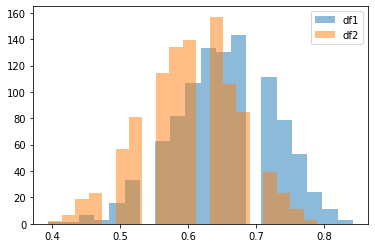

In [16]:
# YOUR CODE HERE
all_scores1=[]
all_scores2=[]

for i in range(1000):
    x_train,x_test, y_train, y_test=train_test_split(x_scaled,y)
    clf1.fit(x_train, y_train)
    clf2.fit(x_train, y_train)
    pred1=clf1.predict(x_test)
    pred2=clf2.predict(x_test)
    score1=accuracy_score(y_test, pred1)
    score2=accuracy_score(y_test, pred2)
    all_scores1.append(score1)
    all_scores2.append(score2)
    
plt.hist(all_scores1,label='df1',bins=20,alpha=0.5)
plt.hist(all_scores2,label='df2',bins=20,alpha=0.5)
plt.legend()

### Just scratching the surface...

This is just the start of what you can do with scikit-learn.  It is clear from the documentation that there are many different methods and algorithms for classification that are supported by the package, as well as different ways of optimizing and assessing the performance of different algorithms.  If you are motivated to explore further, feel free to continue below by opening more code cells and using the scikit-learn documentation to guide some further exploration.